In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
import os

In [2]:
# Function to load images from a directory
def load_images_from_folder(folder_path, target_size=None):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_COLOR)
        if img is not None:
            if target_size:
                img = cv2.resize(img, target_size)
            img = img.astype('float32') / 255.0  # Normalize
            images.append(img)
    return np.array(images)

In [3]:
# Load training data
train_low_res_path = 'C:\\Users\\Lenovo\\Downloads\\resolution\\dataset\\train\\low_res'
train_high_res_path = 'C:\\Users\\Lenovo\\Downloads\\resolution\\dataset\\train\\high_res'

train_low_res_images = load_images_from_folder(train_low_res_path)
train_high_res_images = load_images_from_folder(train_high_res_path)

In [4]:
# Load validation data
val_low_res_path = 'C:\\Users\\Lenovo\\Downloads\\resolution\\dataset\\val\\low_res'
val_high_res_path = 'C:\\Users\\Lenovo\\Downloads\\resolution\\dataset\\val\\high_res'

val_low_res_images = load_images_from_folder(val_low_res_path)
val_high_res_images = load_images_from_folder(val_high_res_path)

In [5]:
from tensorflow.keras import layers, models

# Updated SRCNN Model Architecture
def build_updated_srcnn_model(input_shape):
    model = models.Sequential()

    # First Convolution Layer (increased kernel size to 11x11)
    model.add(layers.Conv2D(64, (11, 11), activation='relu', padding='same', input_shape=input_shape))

    # Second Convolution Layer (increased kernel size to 3x3)
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))

    # New added Convolution Layer (to improve feature extraction, kernel size 5x5)
    model.add(layers.Conv2D(16, (5, 5), activation='relu', padding='same'))

    # Third Convolution Layer (Output Layer, kernel size 7x7)
    model.add(layers.Conv2D(3, (7, 7), activation='linear', padding='same'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    
    return model

In [6]:
# Build Model
input_shape = (train_low_res_images.shape[1], train_low_res_images.shape[2], train_low_res_images.shape[3])  # Image shape (height, width, channels)
model = build_updated_srcnn_model(input_shape)

# Train the Model
model.fit(train_low_res_images, train_high_res_images, 
          epochs=100, 
          batch_size=16, 
          validation_data=(val_low_res_images, val_high_res_images))

# Save the model
model.save('super_resolution_model.h5')

c:\Users\Lenovo\Desktop\ML\sklearn-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 37381s 890s/step - accuracy: 0.3862 - loss: 0.0620 - val_accuracy: 0.5136 - val_loss: 0.0128
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 193s 4s/step - accuracy: 0.5753 - loss: 0.0096 - val_accuracy: 0.6069 - val_loss: 0.0071
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 198s 5s/step - accuracy: 0.6192 - loss: 0.0061 - val_accuracy: 0.7093 - val_loss: 0.0045
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 207s 5s/step - accuracy: 0.6980 - loss: 0.0039 - val_accuracy: 0.7597 - val_loss: 0.0032
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 224s 5s/step - accuracy: 0.7426 - loss: 0.0031 - val_accuracy: 0.7531 - val_loss: 0.0028
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 253s 5s/step - accuracy: 0.7343 - loss: 0.0031 - val_accuracy: 0.7867 - val_loss: 0.0027
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 227s 5s/step - accuracy: 0.7757 - loss: 0.0024 - val_accuracy: 0.7566 - val_loss: 0.0025
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 232s 5s/step - accuracy: 0.7681 - loss: 0.0024 - val_accuracy

In [7]:
# Function to enhance low-resolution images
def enhance_image(model, low_res_image):
    low_res_image = np.expand_dims(low_res_image, axis=0)
    high_res_image = model.predict(low_res_image)
    high_res_image = np.squeeze(high_res_image, axis=0)
    return high_res_image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


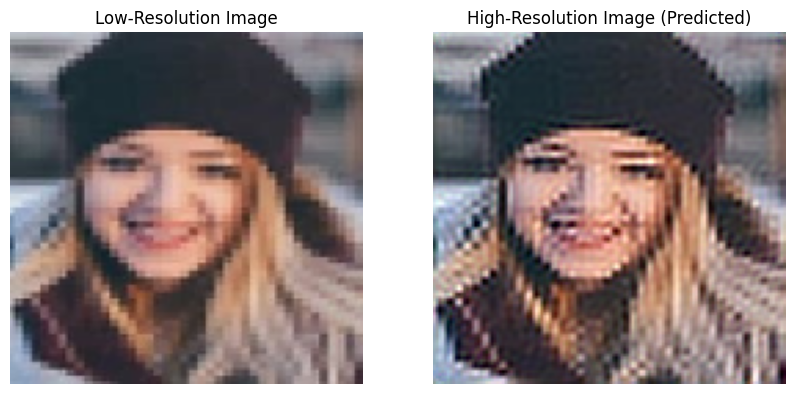

In [26]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load single image for testing
def load_single_image(image_path, target_size=None):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Read the image in BGR format
    if img is not None and target_size:
        img = cv2.resize(img, target_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = img.astype('float32') / 255.  # Normalize to range [0, 1]
    return img

# Function to enhance image using trained SRCNN model
def enhance_image(model, low_res_image):
    low_res_image = np.expand_dims(low_res_image, axis=0)  # Add batch dimension
    high_res_image = model.predict(low_res_image)
    return high_res_image.squeeze()  # Remove batch dimension

# Load a test image
low_res_test = load_single_image(r'C:\\Users\\Lenovo\\Pictures\\download1.jpeg', target_size=(128, 128))

# Generate the high-resolution image
high_res_result = enhance_image(model, low_res_test)

# Show low-res and high-res images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Low-Resolution Image')
plt.imshow(low_res_test)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('High-Resolution Image (Predicted)')
plt.imshow(high_res_result)
plt.axis('off')

plt.show()